DataFrame limpio:


,id,cliente,monto,plazo_meses,fecha_desembolso,producto
0,201,Juan,5000000.0,36.00,2023-01-05,Consumo
1,202,Maria,7500000.0,24.00,2023-02-10,Consumo
2,203,Pedro,2996875.0,12.00,2023-03-10,Pyme
3,204,Luis,2996875.0,27.75,2023-04-01,Consumo
4,205,Ana,2996875.0,27.75,2023-05-15,Hipotecario
5,206,Carlos,10000.0,12.00,2023-01-05,Consumo
6,207,Laura,2996875.0,60.00,2023-07-07,Pyme
7,208,Andres,3500000.0,27.75,2023-08-02,Consumo
8,209,Andres,4500000.0,18.00,2023-09-12,Consumo
9,210,Diego,15000.0,27.75,2023-10-05,Consumo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                12 non-null     int64         
 1   cliente           12 non-null     object        
 2   monto             12 non-null     float64       
 3   plazo_meses       12 non-null     float64       
 4   fecha_desembolso  12 non-null     datetime64[ns]
 5   producto          12 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 708.0+ bytes


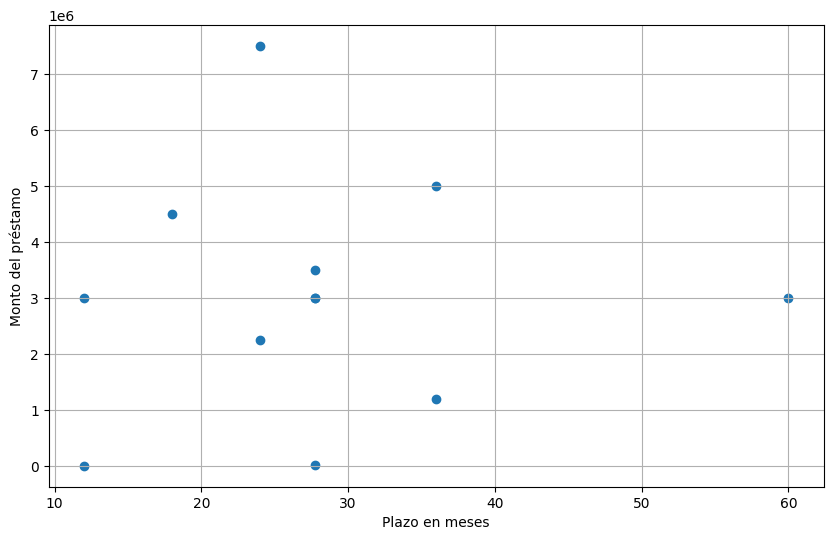

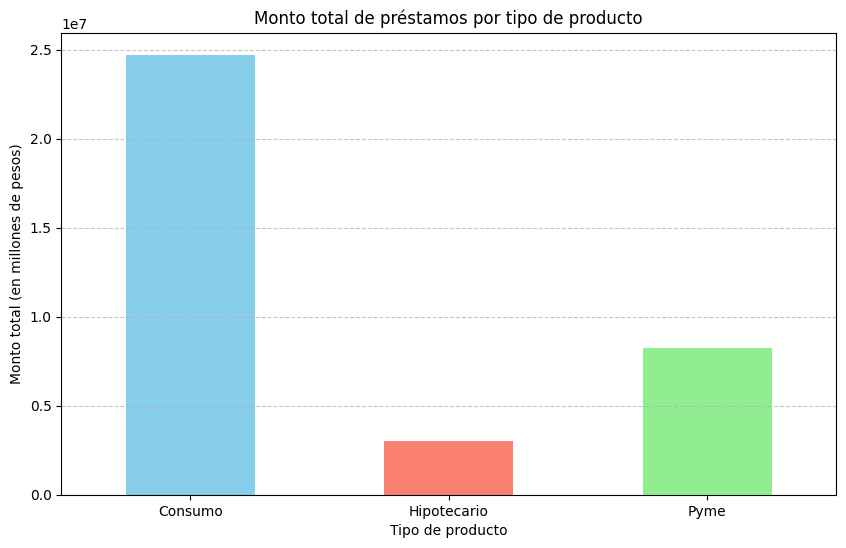

Consulta final: Suma de montos y promedio de plazos por cliente y producto


,cliente,producto,total_monto,promedio_plazo
1,Andres,Consumo,8000000.0,22.875
7,Maria,Consumo,7500000.0,24.000
4,Juan,Consumo,5000000.0,36.000
0,Ana,Hipotecario,2996875.0,27.750
6,Luis,Consumo,2996875.0,27.750
5,Laura,Pyme,2996875.0,60.000
9,Pedro,Pyme,2996875.0,12.000
8,Maria,Pyme,2250000.0,24.000
2,Carlos,Consumo,1210000.0,24.000
3,Diego,Consumo,15000.0,27.750


In [ ]:
"""##3. Reto de la Sesion
Limpien estos datos de la forma que mejor les parezca y segun lo visto, tambien investiguen el comando pd.to_datetime para la columna fecha_desembolso y como lo vimos la monitoria pasada, hagan un grafico a su eleccion basico de los datos, ejemplo: grafico de dispersion de monto y plazo_meses.

Al final deberan generar una consulta como la ultima vista.
"""

import numpy as np
import pandas as pd
df_prestamos_sucio = pd.DataFrame([
    {"id": 201, "cliente": "Juan",   "monto": "5.000.000",   "plazo_meses": "36",            "fecha_desembolso": "2023-01-05", "producto": "Consumo"},
    {"id": 202, "cliente": "Maria",  "monto": "$7,500,000",  "plazo_meses": "24 ",           "fecha_desembolso": "2023-02-10", "producto": "Consumo"},
    {"id": 203, "cliente": "Pedro",  "monto": "N/A",         "plazo_meses": 12,              "fecha_desembolso": "2023-03-10", "producto": "Pyme"},
    {"id": 204, "cliente": "Luis",   "monto": "error",       "plazo_meses": "treinta y seis","fecha_desembolso": "2023-04-01", "producto": "Consumo"},
    {"id": 205, "cliente": "Ana",    "monto": 9000000,       "plazo_meses": None,            "fecha_desembolso": "2023-05-15", "producto": "Hipotecario"},
    {"id": 206, "cliente": "Carlos", "monto": "10k",         "plazo_meses": "12",            "fecha_desembolso": "na", "producto": "Consumo"},
    {"id": 207, "cliente": "Laura",  "monto": np.nan,        "plazo_meses": 60,              "fecha_desembolso": "2023-07-07", "producto": "Pyme"},
    {"id": 208, "cliente": "Andres", "monto": "3.500.000",   "plazo_meses": "N/A",           "fecha_desembolso": "2023-08-02", "producto": "Consumo"},
    {"id": 209, "cliente": "Andres",  "monto": "4.500.000",   "plazo_meses": 18,              "fecha_desembolso": "2023-09-12", "producto": "Consumo"},
    {"id": 210, "cliente": "Diego",  "monto": "15K",         "plazo_meses": "doce",          "fecha_desembolso": "2023-10-05", "producto": "Consumo"},
    {"id": 211, "cliente": "Maria", "monto": "$2.250.000",  "plazo_meses": "24",            "fecha_desembolso": "2023-11-01", "producto": "Pyme"},
    {"id": 212, "cliente": "Carlos",  "monto": "1,200,000",   "plazo_meses": "36",            "fecha_desembolso": "2023-11-20", "producto": "Consumo"},
])

# MONTO
# Eliminar ($) y (,). Pasar a numeric
df_prestamos_sucio['monto'] = df_prestamos_sucio['monto'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df_prestamos_sucio['monto'] = df_prestamos_sucio['monto'].str.replace('.', '', regex=False)
has_k = df_prestamos_sucio['monto'].str.contains('k', case=False, na=False)
df_prestamos_sucio.loc[has_k, 'monto'] = pd.to_numeric(df_prestamos_sucio.loc[has_k, 'monto'].str.replace('k', '', case=False), errors='coerce') * 1000
df_prestamos_sucio['monto'] = pd.to_numeric(df_prestamos_sucio['monto'], errors='coerce')

# PLAZO MESES
df_prestamos_sucio['plazo_meses'] = pd.to_numeric(df_prestamos_sucio['plazo_meses'], errors='coerce')

# FECHA DESEMBOLSO con pd.to_datetime
df_prestamos_sucio['fecha_desembolso'] = pd.to_datetime(df_prestamos_sucio['fecha_desembolso'], errors='coerce')

# VALORES FALTANTES
# Uso media
df_prestamos_sucio['monto'] = df_prestamos_sucio['monto'].fillna(df_prestamos_sucio['monto'].mean())

df_prestamos_sucio['plazo_meses'] = df_prestamos_sucio['plazo_meses'].fillna(df_prestamos_sucio['plazo_meses'].mean())

# En fecha con moda (como es arreglo, el primer valor)
df_prestamos_sucio['fecha_desembolso'] = df_prestamos_sucio['fecha_desembolso'].fillna(df_prestamos_sucio['fecha_desembolso'].mode()[0])

print("DataFrame limpio:")
display(df_prestamos_sucio)

df_prestamos_sucio.info()
df_prestamos_sucio.describe()


# VISUALIZACIÓN
# plazo con monto
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_prestamos_sucio['plazo_meses'], df_prestamos_sucio['monto'])
plt.xlabel('Plazo en meses')
plt.ylabel('Monto del préstamo')
plt.grid(True)
plt.show()

# Monto porn tipo de producto
monto_por_producto = df_prestamos_sucio.groupby('producto')['monto'].sum()

plt.figure(figsize=(10, 6))
monto_por_producto.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Monto total de préstamos por tipo de producto')
plt.xlabel('Tipo de producto')
plt.ylabel('Monto total (en millones de pesos)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# CONSULTA FINAL
consulta_final = df_prestamos_sucio.groupby(['cliente', 'producto']).agg(
    total_monto=('monto', 'sum'),
    promedio_plazo=('plazo_meses', 'mean')
).reset_index().sort_values(by="total_monto", ascending=False)

print("Consulta final: Suma de montos y promedio de plazos por cliente y producto")
display(consulta_final)